In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
data = pd.read_csv('/diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
data.shape


(10, 9)

In [36]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               10 non-null     int64  
 1   Glucose                   10 non-null     int64  
 2   BloodPressure             10 non-null     int64  
 3   SkinThickness             10 non-null     int64  
 4   Insulin                   10 non-null     int64  
 5   BMI                       10 non-null     float64
 6   DiabetesPedigreeFunction  10 non-null     float64
 7   Age                       10 non-null     int64  
 8   Outcome                   10 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 852.0 bytes


In [37]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.40000,127.300000,59.800000,19.900000,89.300000,27.710000,0.507800,35.900000,0.600000
std,3.50238,40.075068,25.654976,17.978073,169.937276,11.259016,0.654114,11.873874,0.516398
min,0.00000,78.000000,0.000000,0.000000,0.000000,0.000000,0.134000,21.000000,0.000000
25%,1.25000,95.500000,53.500000,0.000000,0.000000,25.850000,0.175500,29.250000,0.000000
50%,4.00000,120.500000,66.000000,26.000000,0.000000,29.300000,0.240000,31.500000,1.000000
75%,7.50000,145.250000,71.500000,34.250000,92.500000,32.950000,0.558000,45.750000,1.000000
max,10.00000,197.000000,96.000000,45.000000,543.000000,43.100000,2.288000,54.000000,1.000000


In [38]:
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


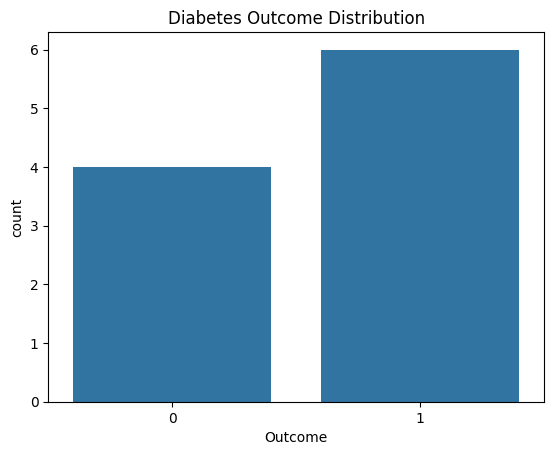

In [39]:
sns.countplot(x='Outcome', data=data)
plt.title("Diabetes Outcome Distribution")
plt.show()


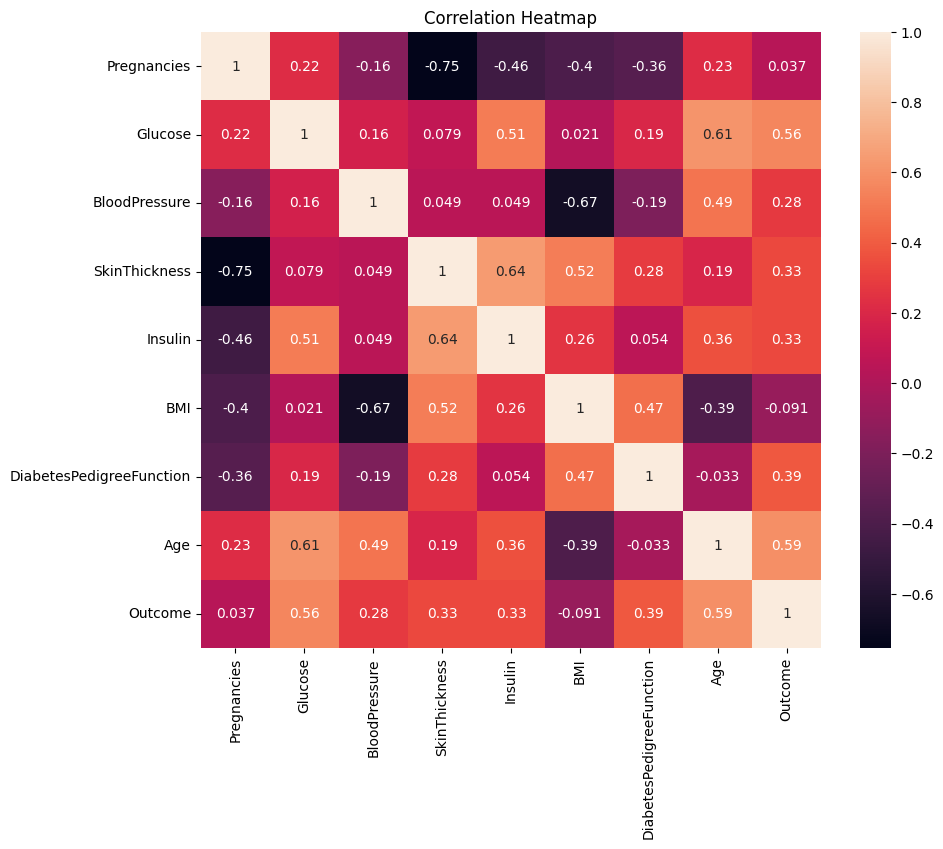

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [41]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [45]:
y_pred = model.predict(X_test)


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


In [47]:
confusion_matrix(y_test, y_pred)


array([[0, 1],
       [0, 1]])

In [48]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
input_data = (5,116,74,0,0,25.6,0.201,30)
input_data = np.asarray(input_data).reshape(1,-1)
input_data = scaler.transform(input_data)

prediction = model.predict(input_data)

if prediction[0] == 1:
    print("The person is Diabetic")
else:
    print("The person is NOT Diabetic")


The person is NOT Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
